
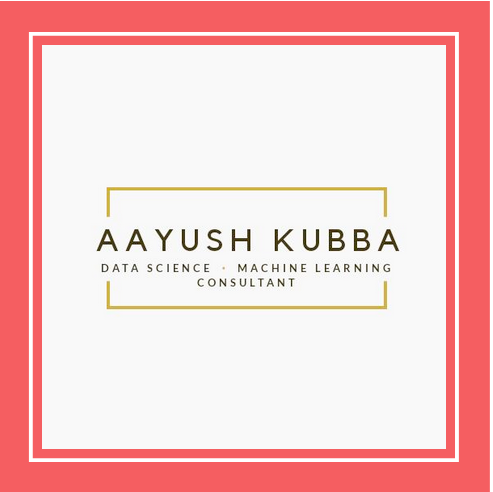


<b>More About Me </b>

https://docs.google.com/presentation/d/16e3OtwyDE8M7CWu7dZoQFTz23YbeYwI0qlKOCM3oExY/edit?usp=sharing

# Object Detection

When we look at images or videos, we can easily locate and identify the objects of our interest within moments. 

Passing on of this intelligence to computers is nothing but object detection — locating the object and identifying it. 

Object Detection has found its application in a wide variety of domains such as video surveillance, image retrieval systems, autonomous driving vehicles and many more. 

Various algorithms can be used for object detection but we will be focusing on YoloV3 algorithm.

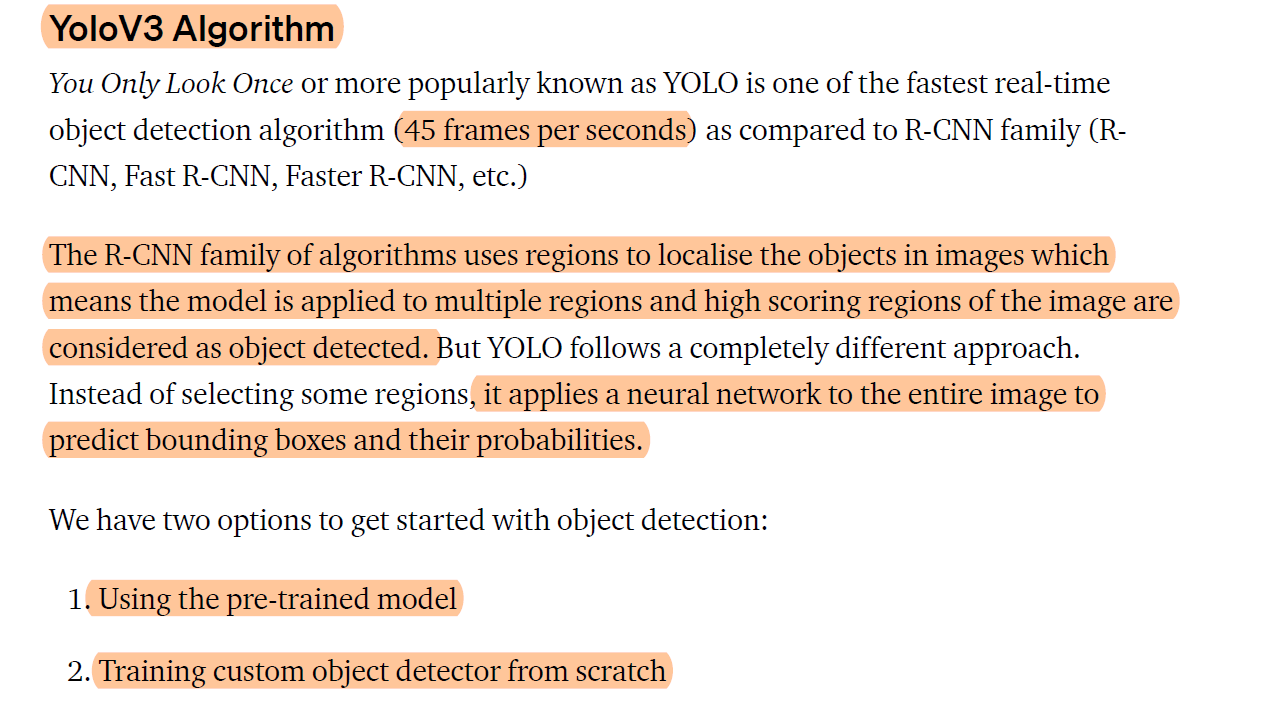

In [65]:
!pip install opencv-python

# Import

In [66]:
# Imports
import cv2
import numpy as np
import argparse
import time
import os

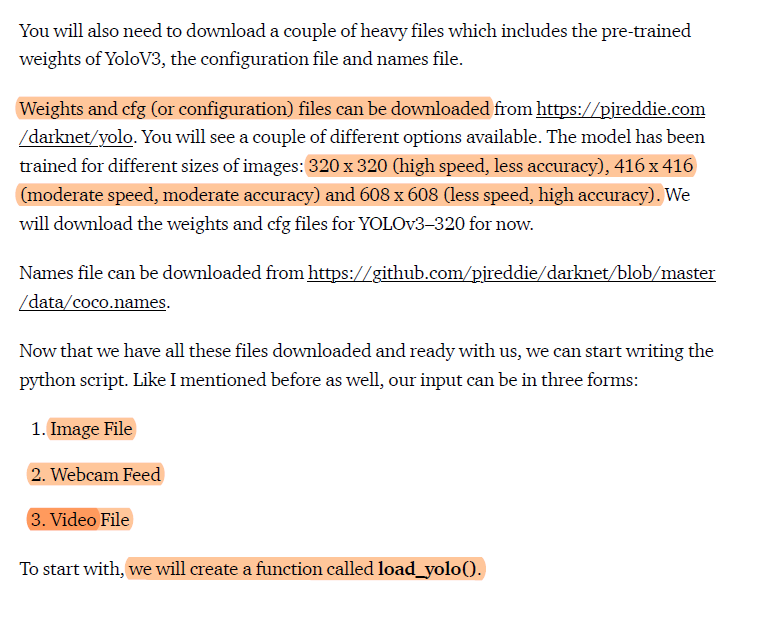

In [3]:
os.curdir

'.'

In [4]:
import os
os.listdir()

['coco.names',
 'images',
 'yolov3-tiny.cfg',
 'YOLO-Practice(AK).ipynb',
 'yolov3.cfg',
 'readme.md',
 'Yolo-Class Practice.ipynb',
 '.gitignore',
 '.ipynb_checkpoints',
 'Object Detection-YOLO.ipynb',
 'yolov3.weights']

In [5]:
os.listdir() # Check if you have downloaded all the models

['coco.names',
 'images',
 'yolov3-tiny.cfg',
 'YOLO-Practice(AK).ipynb',
 'yolov3.cfg',
 'readme.md',
 'Yolo-Class Practice.ipynb',
 '.gitignore',
 '.ipynb_checkpoints',
 'Object Detection-YOLO.ipynb',
 'yolov3.weights']

In [67]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg") 
layers_names = net.getLayerNames()


In [68]:
layers_names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [70]:
net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [71]:
layers_names[199]

'yolo_82'

In [72]:
layers_names[227-1]

'yolo_94'

In [73]:
layers_names[254-1]

'yolo_106'

In [9]:
for i in net.getUnconnectedOutLayers():
    layers_names[i-1]
    

In [10]:
[layers_names[i-1] for i in net.getUnconnectedOutLayers()] 

['yolo_82', 'yolo_94', 'yolo_106']

In [11]:
# from cv2 import dnn

In [12]:
layers_names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [74]:
classes = []  #Creating list of classes
with open("coco.names", "r") as f:                             #coco.names file contains the names of the different                                                                     
    classes = [line.strip() for line in f.readlines()] 

In [75]:
len(classes)

80

In [77]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [79]:
classes[0]

'person'

In [80]:
colors[0]

array([143.67111927, 212.78889318,  42.19490145])

# Load YOLO

In [81]:
#Load yolo
def load_yolo():
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg") #Lodaing Weights from Open CV Deep Neural Network Module
    classes = []  #Creating list of classes
    with open("coco.names", "r") as f:                             #coco.names file contains the names of the different                                                                     
        classes = [line.strip() for line in f.readlines()]            #objects that our model has been trained to identify

    layers_names = net.getLayerNames()     #Layers Names
    output_layers = [layers_names[i-1] for i in net.getUnconnectedOutLayers()] 
    colors = np.random.uniform(0, 255, size=(len(classes), 3))    #Initialising Random Color for boxes
    return net, classes, colors, output_layers

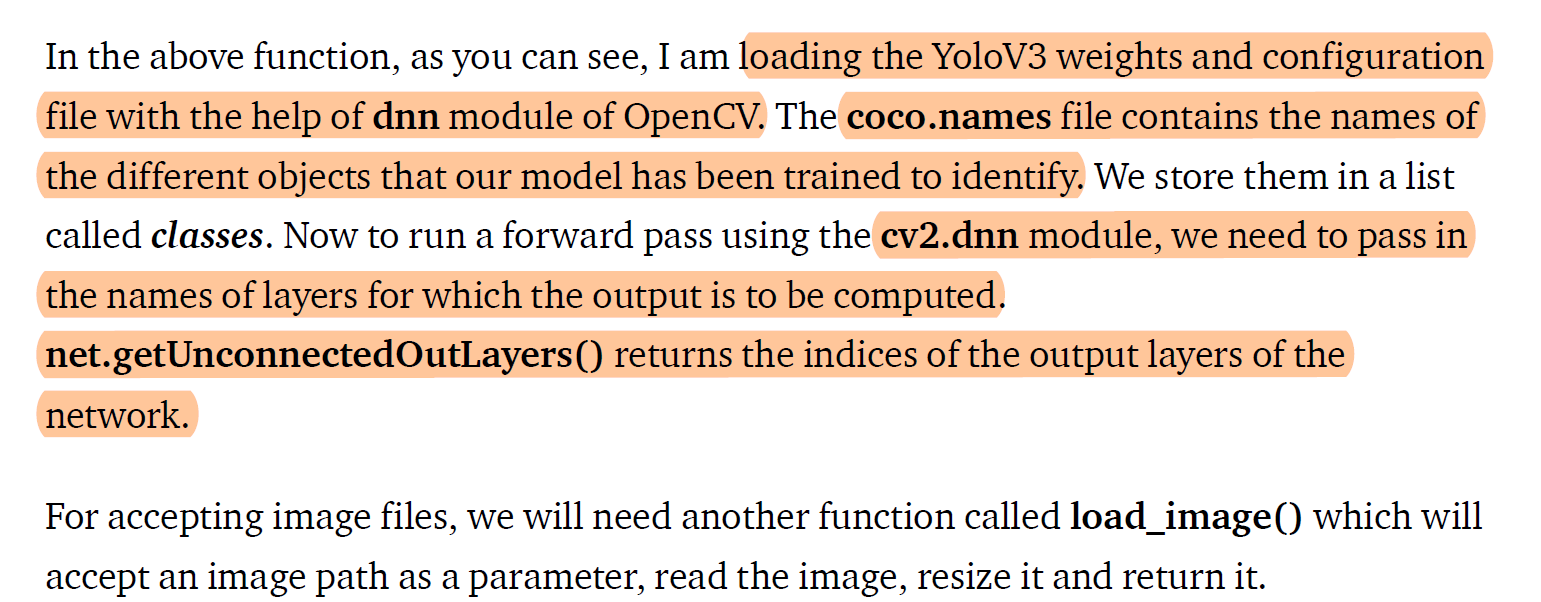

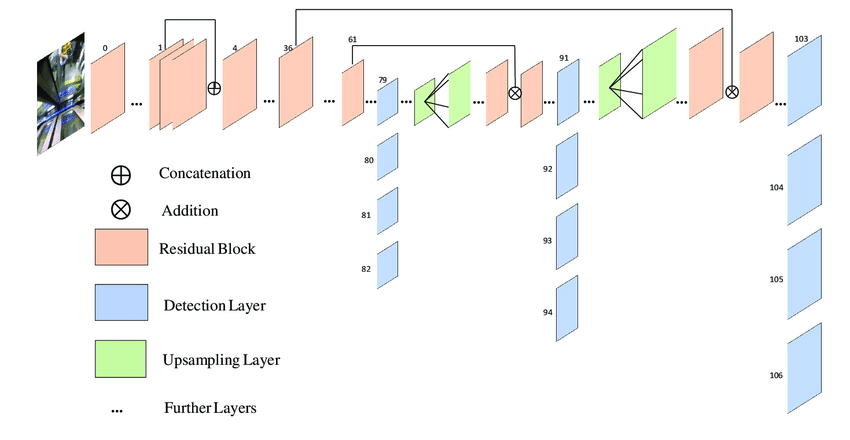

In [82]:
model, classes, colors, output_layers = load_yolo()

## check the op

In [87]:
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

First, YOLO v3 uses a variant of Darknet, which originally has 53 layer network trained on Imagenet. For the task of detection, 53 more layers are stacked onto it, giving us a 106 layer fully convolutional underlying architecture for YOLO v3. This is the reason behind the slowness of YOLO v3 compared to YOLO v2. Here is how the architecture of YOLO now looks like.


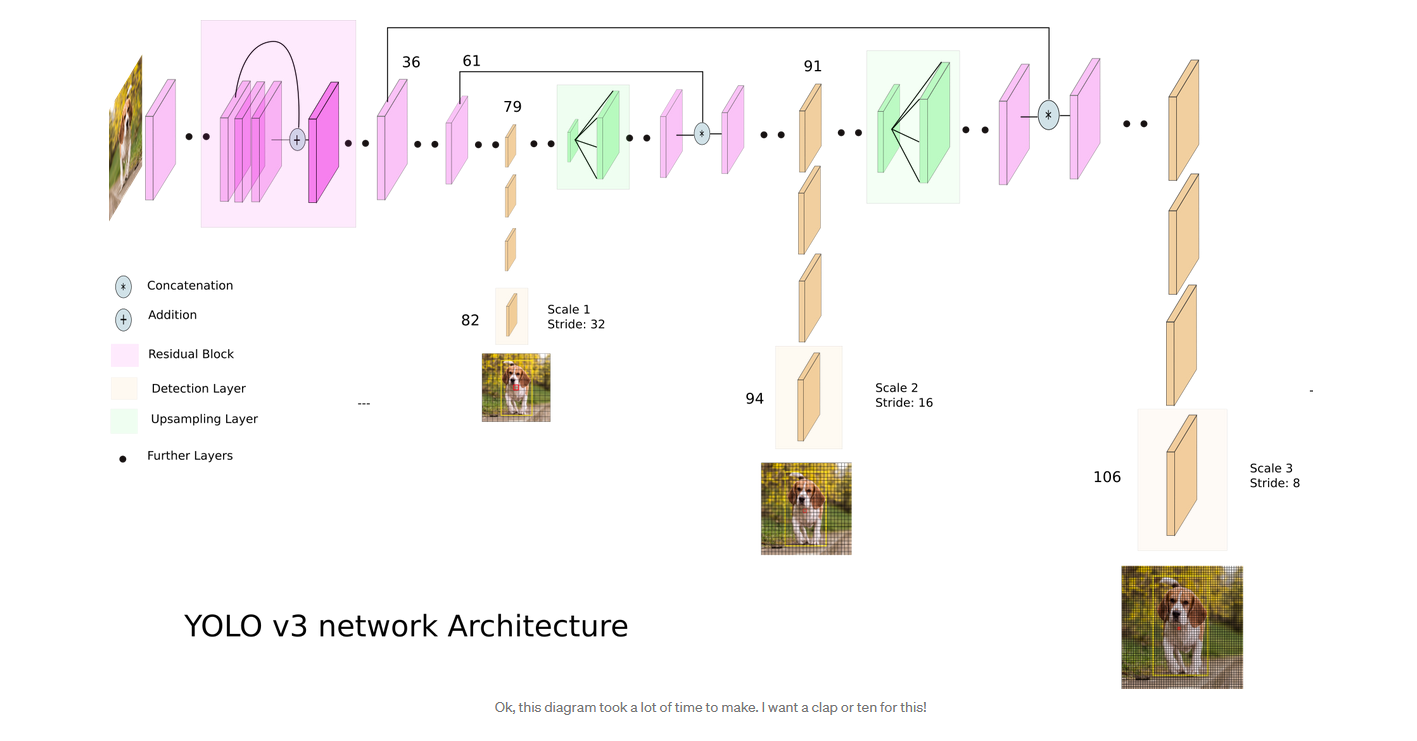

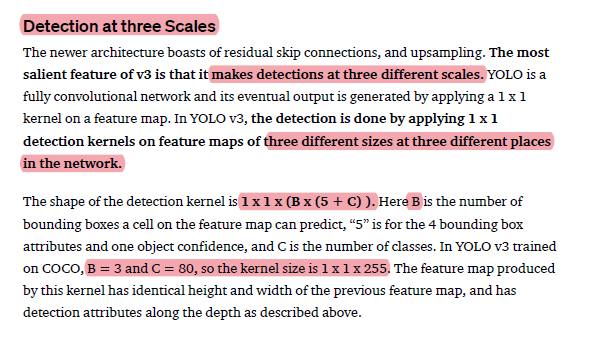

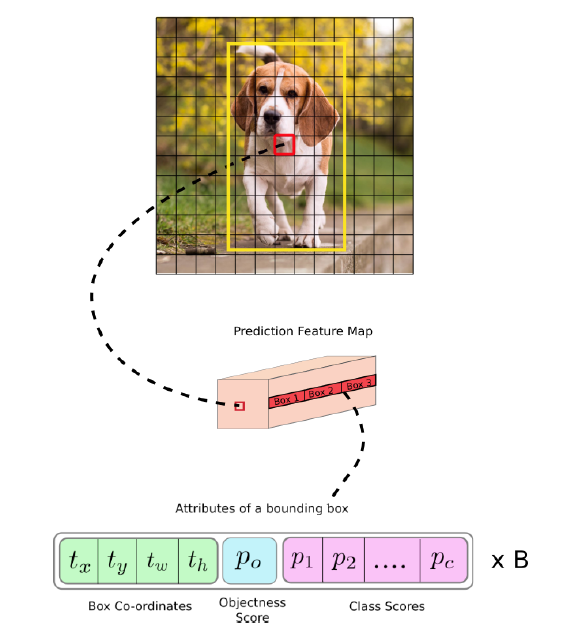

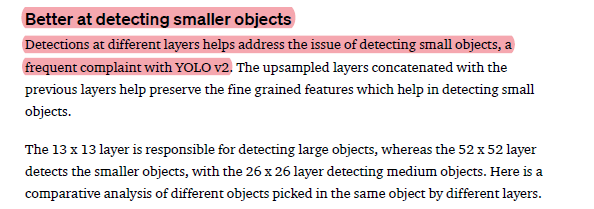

## Get all the classes on which the model has been trained

In [19]:
for i in classes:
    print(i)

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


## Look at other things

In [20]:
model

<dnn_Net 0x7f9c2b516250>

In [21]:
len(colors),len(classes)#created a bounding box for each of the object in the image.

(80, 80)

In [22]:
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

# Load the Images

In [88]:
#Helper Function for Loading Image
def load_image(img_path):
    img = cv2.imread(img_path)#Read the files
    img = cv2.resize(img, None, fx=0.4, fy=0.4) #Reshape the image
    height, width, channels = img.shape
    return img, height, width, channels
    cap = cv2.VideoCapture(0)
    return cap

In [89]:
# How this function works

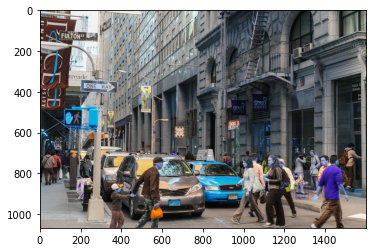

1067 1600 3
427 640 3


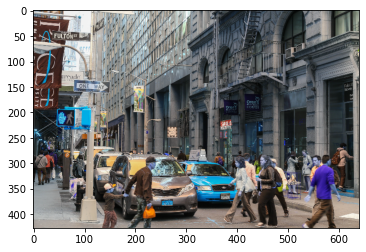

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("images/6399.jpg", 1)
# Loading the image
plt.imshow(image)
plt.show()
images_scaled=cv2.resize(image, None, fx=0.4, fy=0.4)
plt.imshow(images_scaled)

height, width, channels = image.shape
print(height, width, channels)
height, width, channels = images_scaled.shape
print(height, width, channels)

In [26]:
# Ony for exploration

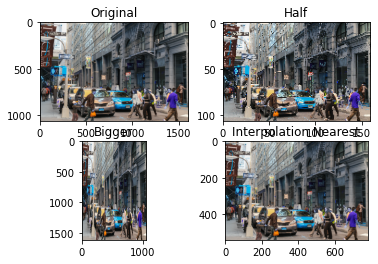

In [91]:
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))

stretch_near = cv2.resize(image, (780, 540),
			interpolation = cv2.INTER_NEAREST)


Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4

for i in range(count):
	plt.subplot(2, 2, i + 1)
	plt.title(Titles[i])
	plt.imshow(images[i])

plt.show()

To correctly predict the objects with deep neural networks, we need to preprocess our
data and cv2.dnn module provides us with two functions for this purpose:
blobFromImage and blobFromImages. These functions perform scaling, mean
subtraction and channel swap which is optional. We will use blobFromImage in a function called detect_objects() that accepts image/frame from video or webcam
stream, model and output layers as parameters.

In [28]:
1/255

0.00392156862745098

In [92]:
# we have used the scalefactor of 0.00392 which can also be written as 1/255

def detect_objects(img, net, outputLayers):
    blob = cv2.dnn.blobFromImage(img, scalefactor=0.00392, size=(320, 320), mean=(0, 0, 0), swapRB=True, crop=False)
    net.setInput(blob)
    outputs = net.forward(outputLayers)
    return blob, outputs

# net.forward
# Runs forward pass to compute output of layer with name outputName.

# Parameters
#     outputName	name for layer which output is needed to get

# Returns
#     blob for first output of specified layer.

# By default runs forward pass for the whole network. 

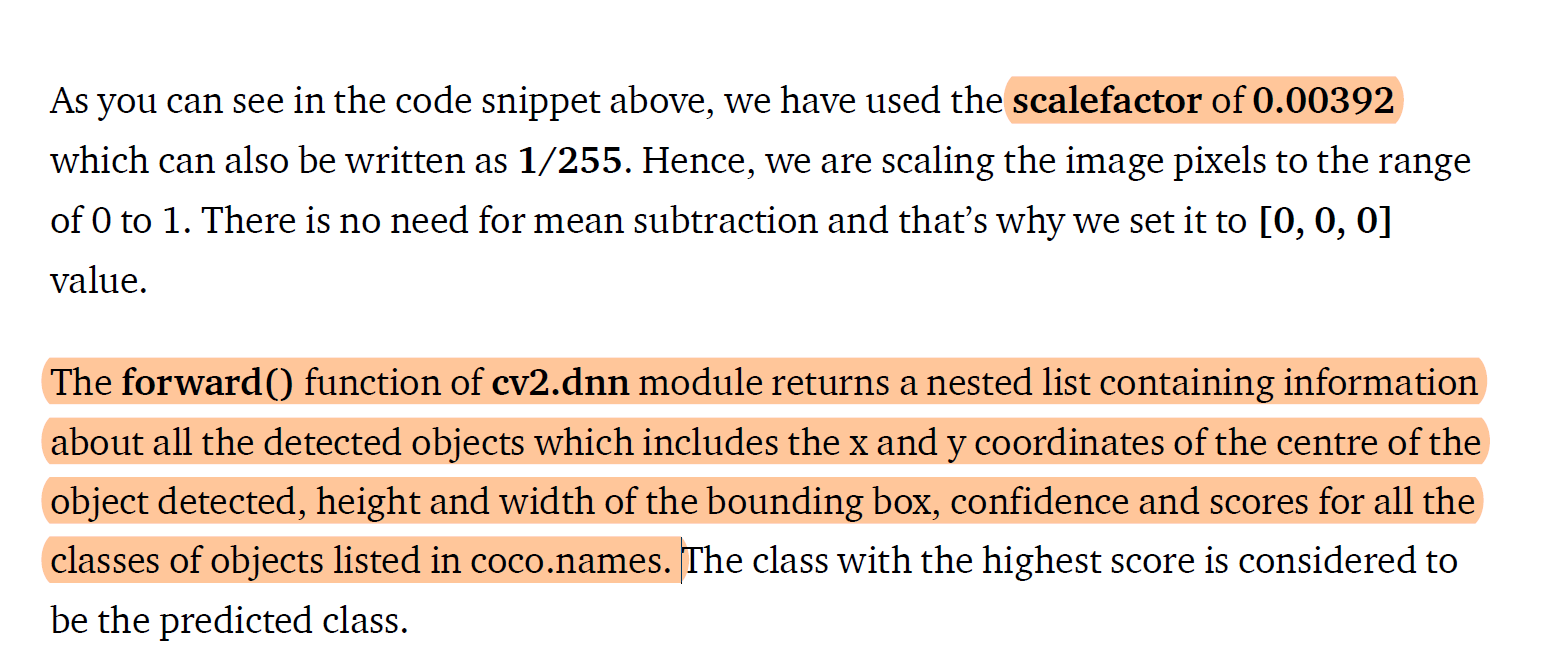

In [94]:
def get_box_dimensions(outputs, height, width):
    boxes = []
    confs = []
    class_ids = []
    for output in outputs:
        for detect in output:
            scores = detect[5:]
            class_id = np.argmax(scores)
            conf = scores[class_id]
            if conf > 0.3:
                center_x = int(detect[0] * width)
                center_y = int(detect[1] * height)
                w = int(detect[2] * width)
                h = int(detect[3] * height)
                x = int(center_x - w/2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confs.append(float(conf))
                class_ids.append(class_id)
    return boxes, confs, class_ids

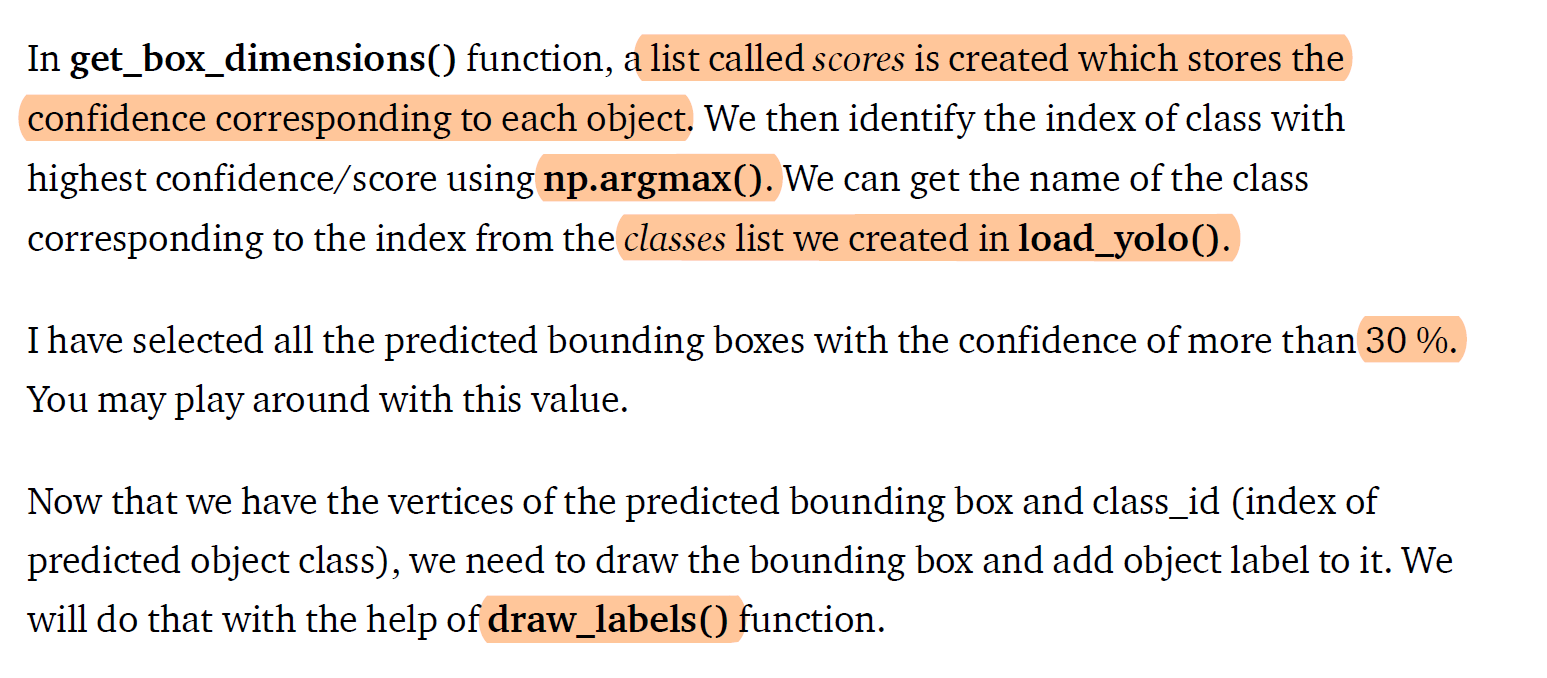

In [95]:
def draw_labels(boxes, confs, colors, class_ids, classes, img): 
    indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
            cv2.putText(img, label, (x, y - 5), font, 1, color, 1)
    cv2.imshow("Image", img)

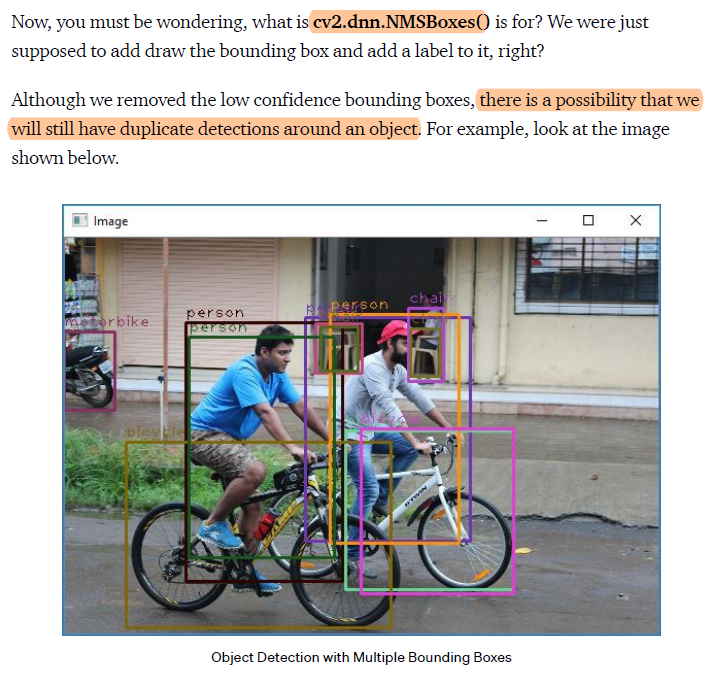

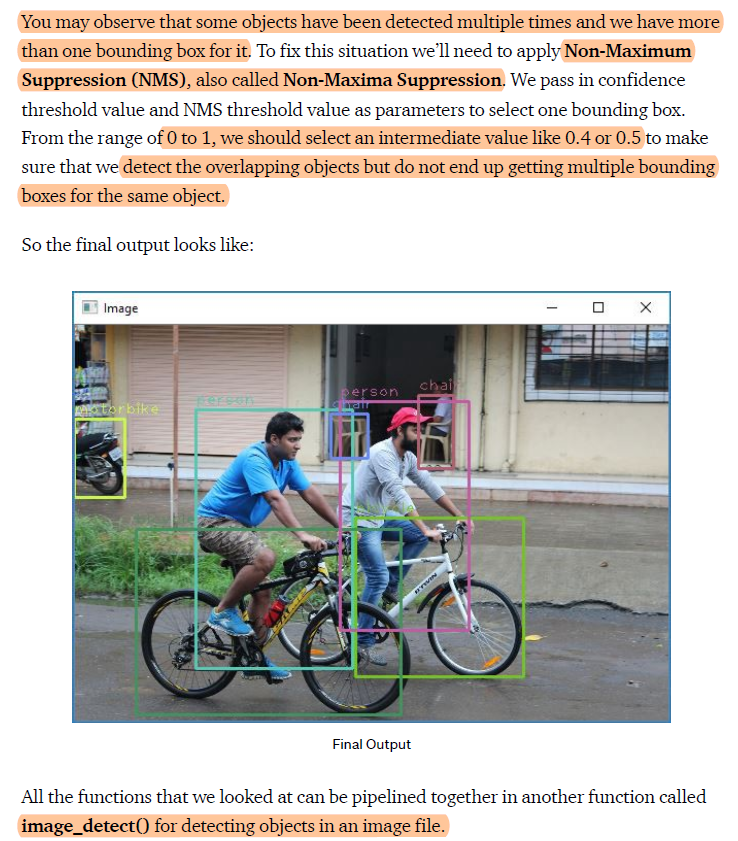

In [96]:
def image_detect(img_path): 
    model, classes, colors, output_layers = load_yolo() #1 Load the Model
    image, height, width, channels = load_image(img_path) #2 Load the Image
    blob, outputs = detect_objects(image, model, output_layers) #3 Preprocess and Paas the image through the network.
    boxes, confs, class_ids = get_box_dimensions(outputs, height, width) #4 Get the boxes
    draw_labels(boxes, confs, colors, class_ids, classes, image) #5 Draw the boxes on te image
    while True:
        key = cv2.waitKey(1)
        if key == 27:
            break
    cv2.destroyAllWindows()

## Lets have a deeper look here

In [97]:
model, classes, colors, output_layers = load_yolo()

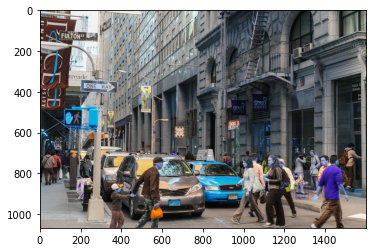

In [98]:
img_path='images/6399.jpg'
image = cv2.imread(img_path)
# Loading the image
plt.imshow(image)
plt.show()


In [99]:
image, height, width, channels = load_image(img_path)

In [100]:
image.shape

(427, 640, 3)

In [101]:
height

427

In [102]:
width

640

In [103]:
channels

3

In [104]:
blob, outputs = detect_objects(image, model, output_layers)

In [105]:
#claed and reshaped image
blob.shape

(1, 3, 320, 320)

In [106]:
len(outputs)

3

In [107]:
outputs[0].shape

(300, 85)

In [108]:
outputs[1].shape

(1200, 85)

In [109]:
outputs[2].shape

(4800, 85)

In [110]:
len(classes)

80

In [111]:
for output in outputs:
    print(output.shape)
    for detect in output:#for each box
        print(detect.shape)
        print(len(detect))
        print(detect)
        scores = detect[5:]
        print(scores)
        
        class_id = np.argmax(scores)
        conf = scores[class_id]
        print(class_id,conf)
        break
    break

(300, 85)
(85,)
85
[4.9109891e-02 6.9895610e-02 4.8205161e-01 1.5312162e-01 1.4605538e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0

<b> This contains the coordinates of the center of the object, height,widtha nd confidence --5 values
    
    and then scores for each class i.e 80 in this case </b>

In [112]:
boxes, confs, class_ids = get_box_dimensions(outputs, height, width)

In [114]:
len(boxes)

37

In [115]:
len(confs)

37

In [116]:
len(class_ids)

37

In [117]:
draw_labels(boxes, confs, colors, class_ids, classes, image)


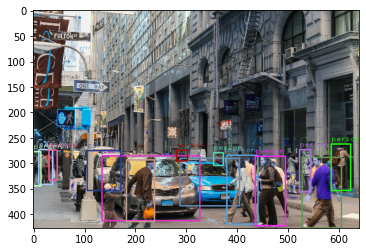

In [118]:
img=image
indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
        cv2.putText(img, label, (x, y - 5), font, 1, color, 1)
plt.imshow(img)

In [119]:
len(indexes)

14

# Define functions for image and video

In [120]:
def image_detect(img_path): 
    model, classes, colors, output_layers = load_yolo()
    image, height, width, channels = load_image(img_path)
    blob, outputs = detect_objects(image, model, output_layers)
    boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
    draw_labels(boxes, confs, colors, class_ids, classes, image)
    while True:
        key = cv2.waitKey(1)
        if key == 27:
            break
    cv2.destroyAllWindows()

In [121]:
def image_detect_only(img_path): 
    model, classes, colors, output_layers = load_yolo()
    image, height, width, channels = load_image(img_path)
    blob, outputs = detect_objects(image, model, output_layers)
    boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
    img=image
    indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
            cv2.putText(img, label, (x, y - 5), font, 1, color, 1)
    plt.imshow( img)

In [122]:
def webcam_detect():
    model, classes, colors, output_layers = load_yolo()
    
    cap = cv2.VideoCapture(0)   # 0 Refers to Webcam
    while True:
        _, frame = cap.read()
        
        height, width, channels = frame.shape
        
        blob, outputs = detect_objects(frame, model, output_layers)
        
        boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
        
        draw_labels(boxes, confs, colors, class_ids, classes, frame)
        
        key = cv2.waitKey(1)
        if key == 27:
            break
    cap.release()
    cv2.destroyAllWindows()

In [123]:
from matplotlib import pyplot as plt

%matplotlib inline
import matplotlib.image as mpimg


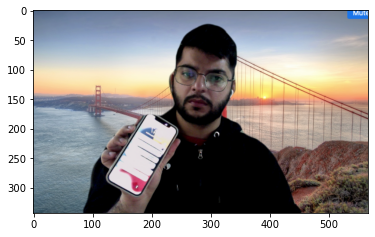

In [134]:
img = mpimg.imread("/Users/aayushkubba/Documents/Screenshots/Screenshot 2021-11-21 at 9.47.08 AM.png")
imgplot = plt.imshow(img)
plt.show()

In [60]:
# image_detect('images/2555.jpg')

In [61]:
# image_detect('/Users/aayushkubba/Documents/Screenshots/Screenshot 2021-11-21 at 12.27.33 AM.png')

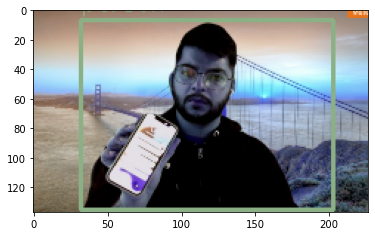

In [135]:
#Detecting using Images, Press Escape to Exit
image_detect_only("/Users/aayushkubba/Documents/Screenshots/Screenshot 2021-11-21 at 9.47.08 AM.png")

In [133]:
#Start Webcam, Press Escape to Exit
webcam_detect()

# DIY
Download a snippet of any video from youtube and run Object detection over it.

In [131]:
model, classes, colors, output_layers = load_yolo()
cap = cv2.VideoCapture("/Users/aayushkubba/Documents/sample.mov")   # 0 Refers to Webcam


In [132]:
while True:
    _, frame = cap.read()

    height, width, channels = frame.shape

    blob, outputs = detect_objects(frame, model, output_layers)
    boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
    draw_labels(boxes, confs, colors, class_ids, classes, frame)

    key = cv2.waitKey(1)
    if key == 27:
        break
cap.release()
# cv2.destroyAllWindows()